In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'../Cascade_Seismic_Stations.xlsx', sheet_name='MSH')
df_s=df.sort_values('Start Yr', ascending=True)
df_tt=df_s.loc[df_s['Latitude']>0].reset_index(drop=True)
df_tt['Name_No_Temp']=df_tt['Name']

# Lets filter df_t as anything which lasted more than a year, not between 2005 and 1980
df_tt['Duration']=df_tt['End Yr']-df_tt['Start Yr']
temp_2005=(df_tt['Start Yr'].between(2004, 2005)) & (df_tt['Duration']<4)
temp_1980=(df_tt['Start Yr'].between(1979, 1985)) & (df_tt['Duration']<4)
print('temp for 2005')
print(sum(temp_2005))
print('temp for 1980')
print(sum(temp_1980))
temp_1980

df_t=df_tt.loc[~(temp_2005|temp_1980)].reset_index(drop=True)
df_t2005=df_tt.loc[(temp_2005)]
df_t1980=df_tt.loc[(temp_1980)]

temp for 2005
9
temp for 1980
17


In [31]:
len(df_tt)-len(df_t2005)-len(df_t1980)

53

In [32]:
len(df_t)

53

In [3]:
df_t.iloc[0:10]

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Name_No_Temp,Duration
0,UW,SHW,46.193640,-122.234920,1972-10-01,2599-12-31 00:00:00,1972.0,2599.0,1sp,SHW,627.0
1,UW,MTM,46.025330,-122.212868,1980-03-27,2599-12-31 00:00:00,1980.0,2599.0,1sp,MTM,619.0
2,UW,JUN,46.147060,-122.152428,1980-05-08,2599-12-31 00:00:00,1980.0,2599.0,1sp,JUN,619.0
3,UW,FLT,46.189079,-122.357460,1980-12-01,1984-08-03 00:00:00,1980.0,1984.0,1sp,FLT,4.0
4,UW,ELK,46.305389,-122.342049,1980-05-16,2599-12-31 00:00:00,1980.0,2599.0,1sp,ELK,619.0
5,UW,SOS,46.243858,-122.137871,1980-05-16,2599-12-31 00:00:00,1980.0,2599.0,1sp,SOS,619.0
6,UW,CDF,46.116890,-122.046227,1980-03-29,2599-12-31 00:00:00,1980.0,2599.0,1sp,CDF,619.0
7,UW,EDM,46.197170,-122.151210,1980-06-01,2599-12-31 00:00:00,1980.0,2599.0,1sp,EDM,619.0
8,UW,YEL,46.209549,-122.188988,1981-10-01,2007-09-18 00:00:00,1981.0,2007.0,1sp,YEL,26.0
9,UW,SUG,46.215549,-122.176262,1981-08-23,2009-08-07 00:00:00,1981.0,2009.0,1sp,SUG,28.0


In [4]:
df_t1980['Classification: 1sp, 3sp, 3bb '].unique()

array(['3sp', '1sp'], dtype=object)

In [5]:
df_t2005

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Name_No_Temp,Duration
38,CC,BLIS,46.197472,-122.186569,2004-10-12,2005-02-17 00:00:00,2004.0,2005.0,1sp,BLIS,1.0
40,CC,SEP,46.199780,-122.190857,2004-11-05,2019-07-25 00:00:00,2004.0,2005.0,3sp,SEP,1.0
41,CC,AHAB,46.194790,-122.187027,2005-02-08,2005-02-17 00:00:00,2005.0,2005.0,1sp,AHAB,0.0
42,CC,MIBL,46.197319,-122.186913,2005-11-18,2007-12-31 00:00:00,2005.0,2007.0,1sp,MIBL,2.0
43,CC,MIDE,46.197750,-122.187439,2005-02-16,2005-07-26 00:00:00,2005.0,2005.0,1sp,MIDE,0.0
44,CC,RAFT,46.195679,-122.186317,2005-07-28,2007-12-31 00:00:00,2005.0,2007.0,1sp,RAFT,2.0
45,CC,WESG,46.195831,-122.193748,2005-07-12,2005-09-14 00:00:00,2005.0,2005.0,1sp,WESG,0.0
46,CC,SEND,46.193501,-122.185432,2005-06-30,2005-11-17 00:00:00,2005.0,2005.0,1sp,SEND,0.0
47,CC,SEP,46.199780,-122.190857,2005-03-15,2006-02-24 00:00:00,2005.0,2006.0,1sp,SEP,1.0


In [6]:
sp1_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']>=2022)
bb3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']>=2022)
sp3_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']>=2022)
if_p=(df_t['Classification: 1sp, 3sp, 3bb ']=="IS")& (df_t['End Yr']>=2022)

sp1_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp") & (df_t['End Yr']<2022)
bb3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb")  & (df_t['End Yr']<2022)
sp3_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp")& (df_t['End Yr']<2022)
if_r=(df_t['Classification: 1sp, 3sp, 3bb ']=="IS")& (df_t['End Yr']<2022)

In [7]:
df_t.loc[sp3_p]

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Name_No_Temp,Duration
25,PB,B201,46.303300,-122.264800,2007-09-13,3000-01-01 00:00:00,2007.0,3000.0,3sp,B201,993.0
27,PB,B204,46.136000,-122.169000,2007-08-01,3000-01-01 00:00:00,2007.0,3000.0,3sp,B204,993.0
28,PB,B203,46.169000,-122.333667,2007-07-19,3000-01-01 00:00:00,2007.0,3000.0,3sp,B203,993.0
29,PB,B203,46.168999,-122.333664,2007-07-18,2599-12-31 00:00:00,2007.0,2599.0,3sp,B203,592.0
30,PB,B202,46.244701,-122.136703,2007-07-25,3000-01-01 00:00:00,2007.0,3000.0,3sp,B202,993.0
31,PB,B201,46.303299,-122.264801,2007-09-12,2599-12-31 00:00:00,2007.0,2599.0,3sp,B201,592.0


## Loop for unique /name

C:\Users\penny\AppData\Local\Temp\ipykernel_27448\2928871037.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


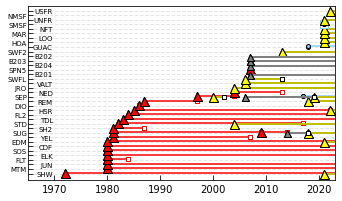

In [34]:

fig, (ax1) = plt.subplots(1, 1, figsize=(10*0.55,3.2), sharey=True)

# Loop for ones that lasted more than 3 years not around major eruptions. 
Unique_station=df_t['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t['Name_No_Temp'].loc[df_t['Name_No_Temp']==station].iloc[0])
    #print(station)
    #print(df_t['Start Yr'].loc[df_t['Name_No_Temp']==station])
    
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="IS"):
        Stat_type_IS=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="IS"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_IS],
                  df_t['End Yr'].loc[Stat_type_IS]], [i+0.15, i+0.15], '-', color='lightskyblue')
        ax1.plot([df_t['End Yr'].loc[Stat_type_IS],
                  df_t['End Yr'].loc[Stat_type_IS]], [i+0.15, i+0.15], 'sk', mec='lightskyblue',mfc='white', ms=8)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_IS],
                  df_t['Start Yr'].loc[Stat_type_IS]], [i+0.1, i+0.15], 'ok', mfc='lightskyblue', ms=4)

        
    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t['Name_No_Temp']==station)&(df_t['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i+0.15, i+0.15], '-r')
        ax1.plot([df_t['End Yr'].loc[Stat_type_1sp],
                  df_t['End Yr'].loc[Stat_type_1sp]], [i+0.15, i+0.15], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_1sp],
                  df_t['Start Yr'].loc[Stat_type_1sp]], [i+0.15, i+0.15], '^k', mfc='red', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3bb"):
        Stat_type_3bb=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3bb"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], '-y', linewidth=2)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3bb],
                  df_t['End Yr'].loc[Stat_type_3bb]], [i, i], 'sk', mec='k', mfc='white', ms=4, zorder=1000)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3bb],
                  df_t['Start Yr'].loc[Stat_type_3bb]], [i, i],  '^k', mfc='yellow', ms=9)

    if any(df_t['Classification: 1sp, 3sp, 3bb '].loc[df_t['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t['Name_No_Temp']==station)
                       &(df_t['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '-', color='grey', linewidth=2, zorder=100)
        ax1.plot([df_t['End Yr'].loc[Stat_type_3sp],
                  df_t['End Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], 'sk', mfc='white', ms=4, zorder=100)
        ax1.plot([df_t['Start Yr'].loc[Stat_type_3sp],
                  df_t['Start Yr'].loc[Stat_type_3sp]], [i-0.1, i-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1

#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='y', lw=2)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='yellow', ms=12)
        
#     if df_t['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-',
#                  color='grey', lw=2)
#         ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
#     #ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white', ms=8)
ax1.set_xlim([1965, 2023])
#     name[i]=str(df_t['Name'].iloc[i])
#     #print(df_t['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
tick_y=np.linspace(0, len(Unique_station)-1,  len(Unique_station)).tolist()
ax1.set_yticks(tick_y)
ax1.set_ylim([-1.5, 37])
#print(name)
ax1.set_yticklabels(name.tolist(), fontsize=7)

for tick in ax1.yaxis.get_major_ticks()[1::2]:
    tick.set_pad(1)
for tick in ax1.yaxis.get_major_ticks()[0::2]:
    tick.set_pad(-25)

ax1.tick_params(length=5, direction="in")
plt.grid(color = 'k', linestyle = '--', linewidth = 1, axis='y', alpha = 0.1)
fig.savefig('MSH_Seismic_Stations.png', dpi=300)

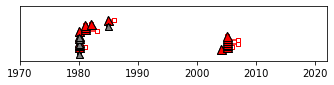

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10*0.55,1), sharey=True)
# Adding temprary ones in from 1980
#-----------------------------------------------------------------------------------------

Unique_station=df_t1980['Name_No_Temp'].unique()
i=0
k=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t1980['Name_No_Temp'].loc[df_t1980['Name_No_Temp']==station].iloc[0])

        
    if any(df_t1980['Classification: 1sp, 3sp, 3bb '].loc[df_t1980['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t1980['Name_No_Temp']==station)&(df_t1980['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_1sp],
                  df_t1980['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '-r')
        ax1.plot([df_t1980['End Yr'].loc[Stat_type_1sp],
                  df_t1980['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_1sp],
                  df_t1980['Start Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '^k', mfc='red', ms=9)


    if any(df_t1980['Classification: 1sp, 3sp, 3bb '].loc[df_t1980['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t1980['Name_No_Temp']==station)
                       &(df_t1980['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_3sp],
                  df_t1980['End Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], '-', color='grey', linewidth=2, zorder=100)
        ax1.plot([df_t1980['End Yr'].loc[Stat_type_3sp],
                  df_t1980['End Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], 'sk', mfc='white', ms=4, zorder=100)
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_3sp],
                  df_t1980['Start Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1
    k=k+0.1
    
# Now for 2005
Unique_station=df_t2005['Name_No_Temp'].unique()
i=0
k=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t2005['Name_No_Temp'].loc[df_t2005['Name_No_Temp']==station].iloc[0])

        
    if any(df_t2005['Classification: 1sp, 3sp, 3bb '].loc[df_t2005['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t2005['Name_No_Temp']==station)&(df_t2005['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_1sp],
                  df_t2005['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '-r')
        ax1.plot([df_t2005['End Yr'].loc[Stat_type_1sp],
                  df_t2005['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_1sp],
                  df_t2005['Start Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '^k', mfc='red', ms=9)


 
        
    i=i+1
    k=k+0.1


#ax1.set_yticklabels(name.tolist())#, rotation=90)
# ticks_loc = ax1.get_yticks().tolist()
# tick_y=np.linspace(0, len(Unique_station)-1,  len(Unique_station)).tolist()
# ax1.set_yticks(tick_y)
ax1.set_ylim([-0.5, 2.5])
# print(name)
ax1.set_xlim([1970, 2022])
ax1.set_yticks([])
#ax1.set_yticklabels(name.tolist(), fontsize=8)
fig.savefig('MSH_Seismic_Stations_Temporary.png', dpi=300, bbox_inches="tight")

In [13]:
Stat_type_1sp=(df_t2005['Classification: 1sp, 3sp, 3bb ']=="1sp")

df_t2005['Name_No_Temp'].loc[Stat_type_1sp].unique()

array(['BLIS', 'AHAB', 'MIBL', 'MIDE', 'RAFT', 'WESG', 'SEND', 'SEP'],
      dtype=object)

In [14]:
Stat_type_1sp=(df_t1980['Classification: 1sp, 3sp, 3bb ']=="1sp")

print(df_t1980['Name_No_Temp'].loc[Stat_type_1sp].unique())
print(len(df_t1980['Name_No_Temp'].loc[Stat_type_1sp].unique()))


['NWD' 'SCB' 'JLF' 'SFT' 'SPL' 'DOG' 'TIM' 'GOA' 'ASH' 'SOA' 'ROA' 'NSP']
12


In [15]:
Stat_type_3sp=(df_t1980['Classification: 1sp, 3sp, 3bb ']=="3sp")

df_t1980['Name_No_Temp'].loc[Stat_type_3sp].unique()

array(['APE', 'MUD', 'CWC', 'CDF', 'DIG'], dtype=object)

In [16]:
Stat_type_1sp=((df_t2005['Name_No_Temp']==station)&(df_t2005['Classification: 1sp, 3sp, 3bb ']=="1sp"))

df_t2005['Name_No_Temp'].loc[Stat_type_1sp].unique()

array(['SEND'], dtype=object)

In [17]:
len(df_t2005)

9

In [18]:
df_t2005

,Network,Name,Latitude,Longitude,Start Date,End Date,Start Yr,End Yr,"Classification: 1sp, 3sp, 3bb",Name_No_Temp,Duration
38,CC,BLIS,46.197472,-122.186569,2004-10-12,2005-02-17 00:00:00,2004.0,2005.0,1sp,BLIS,1.0
40,CC,SEP,46.199780,-122.190857,2004-11-05,2019-07-25 00:00:00,2004.0,2005.0,3sp,SEP,1.0
41,CC,AHAB,46.194790,-122.187027,2005-02-08,2005-02-17 00:00:00,2005.0,2005.0,1sp,AHAB,0.0
42,CC,MIBL,46.197319,-122.186913,2005-11-18,2007-12-31 00:00:00,2005.0,2007.0,1sp,MIBL,2.0
43,CC,MIDE,46.197750,-122.187439,2005-02-16,2005-07-26 00:00:00,2005.0,2005.0,1sp,MIDE,0.0
44,CC,RAFT,46.195679,-122.186317,2005-07-28,2007-12-31 00:00:00,2005.0,2007.0,1sp,RAFT,2.0
45,CC,WESG,46.195831,-122.193748,2005-07-12,2005-09-14 00:00:00,2005.0,2005.0,1sp,WESG,0.0
46,CC,SEND,46.193501,-122.185432,2005-06-30,2005-11-17 00:00:00,2005.0,2005.0,1sp,SEND,0.0
47,CC,SEP,46.199780,-122.190857,2005-03-15,2006-02-24 00:00:00,2005.0,2006.0,1sp,SEP,1.0


## temporary 2005 stations

C:\Users\penny\AppData\Local\Temp\ipykernel_27448\706958980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t2005['Name_No_Temp']=df_t2005['Name']
C:\Users\penny\AppData\Local\Temp\ipykernel_27448\706958980.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


['BLIS' 'SEP' 'AHAB' 'MIBL' 'MIDE' 'RAFT' 'WESG' 'SEND']


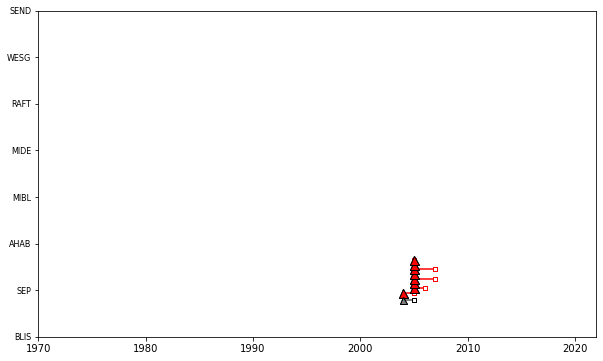

In [19]:
df_t2005['Name_No_Temp']=df_t2005['Name']
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6), sharey=True)

# Loop for ones that lasted more than 3 years not around major eruptions. 
Unique_station=df_t2005['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t2005['Name_No_Temp'].loc[df_t2005['Name_No_Temp']==station].iloc[0])
    if any(df_t2005['Classification: 1sp, 3sp, 3bb '].loc[df_t2005['Name_No_Temp']==station]=="IS"):
        Stat_type_IS=((df_t2005['Name_No_Temp']==station)&(df_t2005['Classification: 1sp, 3sp, 3bb ']=="IS"))
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_IS],
                  df_t2005['End Yr'].loc[Stat_type_IS]], [k+0.15, k+0.15], '-', color='lightskyblue')
        ax1.plot([df_t2005['End Yr'].loc[Stat_type_IS],
                  df_t2005['End Yr'].loc[Stat_type_IS]], [k+0.15, k+0.15], 'sk', mec='lightskyblue',mfc='white', ms=8)
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_IS],
                  df_t2005['Start Yr'].loc[Stat_type_IS]], [k+0.1, k+0.15], 'ok', mfc='lightskyblue', ms=4)

        
    if any(df_t2005['Classification: 1sp, 3sp, 3bb '].loc[df_t2005['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t2005['Name_No_Temp']==station)&(df_t2005['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_1sp],
                  df_t2005['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '-r')
        ax1.plot([df_t2005['End Yr'].loc[Stat_type_1sp],
                  df_t2005['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_1sp],
                  df_t2005['Start Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '^k', mfc='red', ms=9)

    if any(df_t2005['Classification: 1sp, 3sp, 3bb '].loc[df_t2005['Name_No_Temp']==station]=="3bb"):
        Stat_type_3bb=((df_t2005['Name_No_Temp']==station)
                       &(df_t2005['Classification: 1sp, 3sp, 3bb ']=="3bb"))
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_3bb],
                  df_t2005['End Yr'].loc[Stat_type_3bb]], [k, k], '-y', linewidth=2)
        ax1.plot([df_t2005['End Yr'].loc[Stat_type_3bb],
                  df_t2005['End Yr'].loc[Stat_type_3bb]], [k, k], 'sk', mec='k', mfc='white', ms=4, zorder=1000)
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_3bb],
                  df_t2005['Start Yr'].loc[Stat_type_3bb]], [k, k],  '^k', mfc='yellow', ms=9)

    if any(df_t2005['Classification: 1sp, 3sp, 3bb '].loc[df_t2005['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t2005['Name_No_Temp']==station)
                       &(df_t2005['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_3sp],
                  df_t2005['End Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], '-', color='grey', linewidth=2, zorder=100)
        ax1.plot([df_t2005['End Yr'].loc[Stat_type_3sp],
                  df_t2005['End Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], 'sk', mfc='white', ms=4, zorder=100)
        ax1.plot([df_t2005['Start Yr'].loc[Stat_type_3sp],
                  df_t2005['Start Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1
    k=k+0.1

#     if df_t2005['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t2005['Start Yr'].iloc[i],df_t2005['End Yr'].iloc[i]], [k, k], '-',
#                  color='y', lw=2)
#         ax1.plot([df_t2005['End Yr'].iloc[i],df_t2005['End Yr'].iloc[i]], [k, k], '*k', mfc='yellow', ms=12)
        
#     if df_t2005['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t2005['Start Yr'].iloc[i],df_t2005['End Yr'].iloc[i]], [k, k], '-',
#                  color='grey', lw=2)
#         ax1.plot([df_t2005['End Yr'].iloc[i],df_t2005['End Yr'].iloc[i]], [k, k], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t2005['Start Yr'].iloc[i],df_t2005['Start Yr'].iloc[i]], [k, k], '^k', mfc='white')
#     #ax1.plot([df_t2005['End Yr'].iloc[i],df_t2005['End Yr'].iloc[i]], [k, k], '*k', mfc='white', ms=8)
ax1.set_xlim([1970, 2022])
#     name[i]=str(df_t2005['Name'].iloc[i])
#     #print(df_t2005['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
tick_y=np.linspace(0, len(Unique_station)-1,  len(Unique_station)).tolist()
ax1.set_yticks(tick_y)
#ax1.set_ylim([-0.5, 4.5])
print(name)
ax1.set_yticklabels(name.tolist(), fontsize=8)

# #df_t2005['Classification: 1sp, 3sp, 3bb ']

fig.savefig('MSH_Seismic_Stations.png', dpi=300)

## 1980

C:\Users\penny\AppData\Local\Temp\ipykernel_27448\4042747845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1980['Name_No_Temp']=df_t1980['Name']
C:\Users\penny\AppData\Local\Temp\ipykernel_27448\4042747845.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(name.tolist())#, rotation=90)


['APE' 'NWD' 'SCB' 'JLF' 'SFT' 'MUD' 'SPL' 'DOG' 'CWC' 'CDF' 'TIM' 'GOA'
 'ASH' 'SOA' 'ROA' 'DIG' 'NSP']


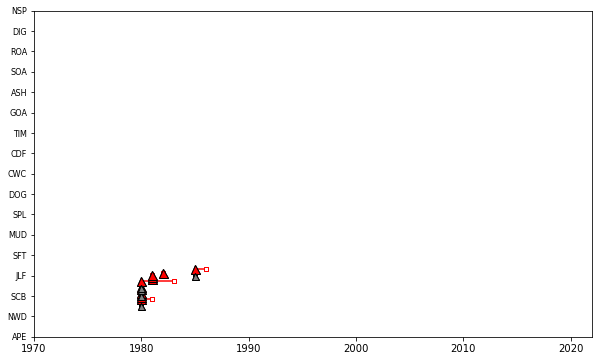

In [20]:
df_t1980['Name_No_Temp']=df_t1980['Name']
fig, (ax1) = plt.subplots(1, 1, figsize=(10,6), sharey=True)

# Loop for ones that lasted more than 3 years not around major eruptions. 
Unique_station=df_t1980['Name_No_Temp'].unique()
i=0
name=np.empty((len(Unique_station)),  np.dtype('U100'))
for station in Unique_station:
    #print(station)
    name[i]=str(df_t1980['Name_No_Temp'].loc[df_t1980['Name_No_Temp']==station].iloc[0])

        
    if any(df_t1980['Classification: 1sp, 3sp, 3bb '].loc[df_t1980['Name_No_Temp']==station]=="1sp"):
        Stat_type_1sp=((df_t1980['Name_No_Temp']==station)&(df_t1980['Classification: 1sp, 3sp, 3bb ']=="1sp"))
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_1sp],
                  df_t1980['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '-r')
        ax1.plot([df_t1980['End Yr'].loc[Stat_type_1sp],
                  df_t1980['End Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], 'sk', mec='red',mfc='white', ms=4)
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_1sp],
                  df_t1980['Start Yr'].loc[Stat_type_1sp]], [k+0.15, k+0.15], '^k', mfc='red', ms=9)


    if any(df_t1980['Classification: 1sp, 3sp, 3bb '].loc[df_t1980['Name_No_Temp']==station]=="3sp"):
        Stat_type_3sp=((df_t1980['Name_No_Temp']==station)
                       &(df_t1980['Classification: 1sp, 3sp, 3bb ']=="3sp"))
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_3sp],
                  df_t1980['End Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], '-', color='grey', linewidth=2, zorder=100)
        ax1.plot([df_t1980['End Yr'].loc[Stat_type_3sp],
                  df_t1980['End Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], 'sk', mfc='white', ms=4, zorder=100)
        ax1.plot([df_t1980['Start Yr'].loc[Stat_type_3sp],
                  df_t1980['Start Yr'].loc[Stat_type_3sp]], [k-0.1, k-0.1], '^k', mfc='grey', ms=7, zorder=100)
        
        # Now print the lines
        
    i=i+1
    k=k+0.1

#     if df_t1980['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3bb":
#         ax1.plot([df_t1980['Start Yr'].iloc[i],df_t1980['End Yr'].iloc[i]], [k, k], '-',
#                  color='y', lw=2)
#         ax1.plot([df_t1980['End Yr'].iloc[i],df_t1980['End Yr'].iloc[i]], [k, k], '*k', mfc='yellow', ms=12)
        
#     if df_t1980['Classification: 1sp, 3sp, 3bb '].iloc[i]=="3sp":
#         ax1.plot([df_t1980['Start Yr'].iloc[i],df_t1980['End Yr'].iloc[i]], [k, k], '-',
#                  color='grey', lw=2)
#         ax1.plot([df_t1980['End Yr'].iloc[i],df_t1980['End Yr'].iloc[i]], [k, k], '*k', mfc='grey', ms=12)
        
        
#     #ax1.plot([df_t1980['Start Yr'].iloc[i],df_t1980['Start Yr'].iloc[i]], [k, k], '^k', mfc='white')
#     #ax1.plot([df_t1980['End Yr'].iloc[i],df_t1980['End Yr'].iloc[i]], [k, k], '*k', mfc='white', ms=8)
ax1.set_xlim([1970, 2022])
#     name[i]=str(df_t1980['Name'].iloc[i])
#     #print(df_t1980['Name'].iloc[i])
ax1.set_yticklabels(name.tolist())#, rotation=90)
ticks_loc = ax1.get_yticks().tolist()
tick_y=np.linspace(0, len(Unique_station)-1,  len(Unique_station)).tolist()
ax1.set_yticks(tick_y)
#ax1.set_ylim([-0.5, 4.5])
print(name)
ax1.set_yticklabels(name.tolist(), fontsize=8)

# #df_t1980['Classification: 1sp, 3sp, 3bb ']

fig.savefig('MSH_Seismic_Stations.png', dpi=300)

In [21]:
#df_a=df_t.loc[df_t['End Yr']>2021]
df_a=df_t
name_plot=np.empty((len(df_a)),  np.dtype('U100'))
for i in range(0, len(df_a)):
    name_plot[i]=str(df_a['Name_No_Temp'].iloc[i])

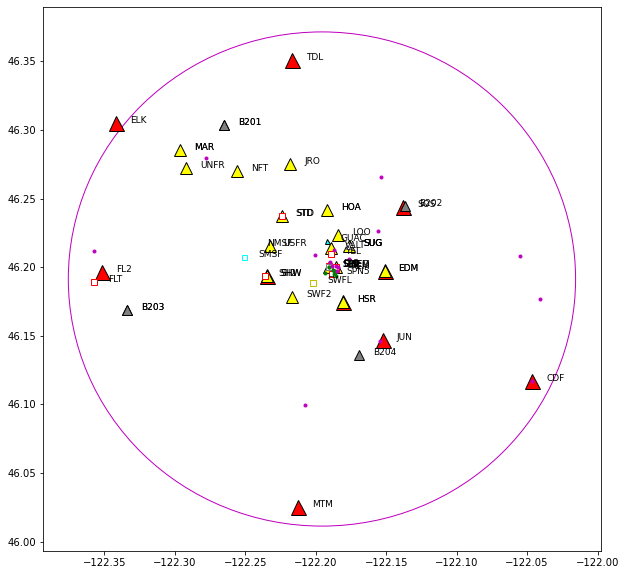

In [36]:
fig, (ax1) = plt.subplots(1, figsize=(10,10), sharey=True)

import matplotlib.patches as patches
rect = patches.Circle((-122.195618,46.191387),0.18,linewidth=1,edgecolor='m',facecolor='none', label='test')

# Add the patch to the Axes
ax1.add_patch(rect)

ax1.plot(df_a['Longitude'].loc[if_p],
              df_a['Latitude'].loc[if_p],
         '^k', mfc='cyan', ms=5)

ax1.plot(df_a['Longitude'].loc[if_r],
              df_a['Latitude'].loc[if_r],
         'sk', mec='cyan', mfc='white', ms=5)

ax1.plot(df_a['Longitude'].loc[sp1_p],
              df_a['Latitude'].loc[sp1_p],
         '^k', mfc='red', ms=15)
ax1.plot(df_a['Longitude'].loc[bb3_p],
              df_a['Latitude'].loc[bb3_p],
         '^k', mfc='yellow', ms=12)
ax1.plot(df_a['Longitude'].loc[sp3_p],
              df_a['Latitude'].loc[sp3_p],
         '^k', mfc='grey', ms=10)


ax1.plot(df_a['Longitude'].loc[sp1_r],
              df_a['Latitude'].loc[sp1_r],
         'sr',  mfc='w')
ax1.plot(df_a['Longitude'].loc[bb3_r],
              df_a['Latitude'].loc[bb3_r],
         'sy',  mfc='w')
ax1.plot(df_a['Longitude'].loc[sp3_r],
              df_a['Latitude'].loc[sp3_r],
         's', mec='grey', mfc='w')
for i in range(0, len(df_a)):
    ax1.annotate(name_plot[i],
                 xy=(df_a['Longitude'].iloc[i]+0.01,
              df_a['Latitude'].iloc[i]),
                 xycoords="data", fontsize=9)
    
ax1.plot(df_t2005['Longitude'], df_t2005['Latitude'], 'og', ms=3)
ax1.plot(df_t1980['Longitude'], df_t1980['Latitude'], 'om', ms=3)
fig.savefig('MSH_map.png', dpi=500)

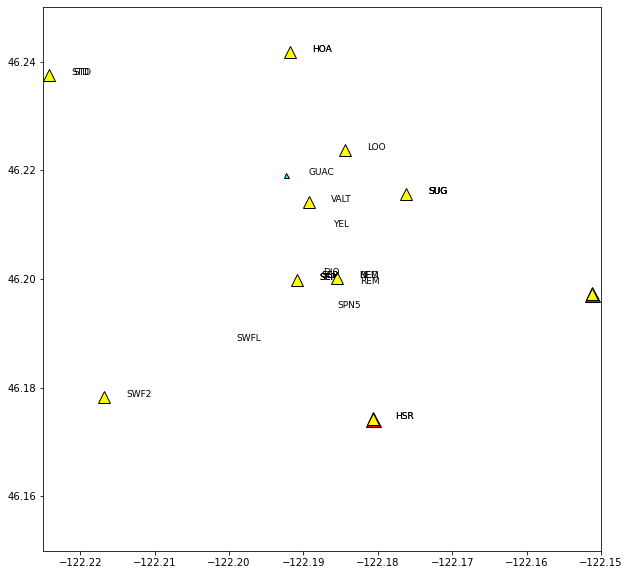

In [23]:

fig, (ax1) = plt.subplots(1, figsize=(10,10), sharey=True)

import matplotlib.patches as patches
rect = patches.Circle((-122.195618,46.191387),0.18,linewidth=1,edgecolor='m',facecolor='none', label='test')

ax1.set_xlim([-122.225, -122.15])
ax1.set_ylim([46.15, 46.25])
# Add the patch to the Axes
ax1.add_patch(rect)

ax1.plot(df_a['Longitude'].loc[if_p],
              df_a['Latitude'].loc[if_p],
         '^k', mfc='cyan', ms=5)


ax1.plot(df_a['Longitude'].loc[sp1_p],
              df_a['Latitude'].loc[sp1_p],
         '^k', mfc='red', ms=15)
ax1.plot(df_a['Longitude'].loc[bb3_p],
              df_a['Latitude'].loc[bb3_p],
         '^k', mfc='yellow', ms=12)
ax1.plot(df_a['Longitude'].loc[sp3_p],
              df_a['Latitude'].loc[sp3_p],
         '^k', mfc='grey', ms=10)



for i in range(0, len(df_a)):
    ax1.annotate(name_plot[i],
                 xy=(df_a['Longitude'].iloc[i]+0.003,
              df_a['Latitude'].iloc[i]),
                 xycoords="data", fontsize=9)
    
#ax1.plot(df_t2005['Longitude'], df_t2005['Latitude'], 'og', ms=5)
#ax1.plot(df_t1980['Longitude'], df_t1980['Latitude'], 'om', ms=5)
fig.savefig('MSH_map.png', dpi=500)

In [24]:
str(df_t['Name'].values)

"['SHW' 'MTM' 'JUN' 'FLT' 'ELK' 'SOS' 'CDF' 'EDM' 'YEL' 'SUG' 'SH2' 'STD'\n 'TDL' 'FL2' 'HSR' 'DIO' 'REM' 'SEP' 'SEP' 'NED' 'STD' 'JRO' 'SEP' 'VALT'\n 'SWFL' 'B201' 'SPN5' 'B204' 'B203' 'B203' 'B202' 'B201' 'SUG' 'SWF2'\n 'SUG' 'SEP' 'GUAC' 'REM' 'SUG' 'SEP' 'HOA' 'HOA' 'LOO' 'MAR' 'MAR' 'SHW'\n 'EDM' 'NFT' 'SMSF' 'UNFR' 'NMSF' 'USFR' 'HSR']"

## Different plots showing age progresion

In [25]:
a=['Exp Pet', 'Exp Pet', 'MT', 'Seismics']
type(a)

list

In [26]:
name=np.empty(len(df_t), np.dtype('U100'))
df_t['Name'].iloc[1]
name[1]=str(df_t['Name'].iloc[1])

In [27]:
name

array(['', 'MTM', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', ''], dtype='<U100')

In [28]:
len(name)

53

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
for i in range(0, len(df_t)):
    if 
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '-r')
    ax1.plot([df_t['Start Yr'].iloc[i],df_t['Start Yr'].iloc[i]], [i, i], '^k', mfc='white')
    ax1.plot([df_t['End Yr'].iloc[i],df_t['End Yr'].iloc[i]], [i, i], '*k', mfc='white')
    ax1.set_xlim([1970, 2022])
#df_t['Classification: 1sp, 3sp, 3bb ']

SyntaxError: invalid syntax (2302358890.py, line 3)

# 0  Bar for each different seimometer

## 1. CDF function